<a href="https://colab.research.google.com/github/FrancisBFTC/AI_Consusion_Matrix/blob/main/AI_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow keras

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
Logdir = 'log'

In [ ]:
(train_images, train_labels), (test_images,test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
classes = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tensorboad_callback = tf.keras.callbacks.TensorBoard(Logdir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, y=train_labels,
          epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.8919 - loss: 0.3474 - val_accuracy: 0.9826 - val_loss: 0.0559
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9844 - loss: 0.0481 - val_accuracy: 0.9886 - val_loss: 0.0360
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9899 - loss: 0.0324 - val_accuracy: 0.9894 - val_loss: 0.0316
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9924 - loss: 0.0243 - val_accuracy: 0.9910 - val_loss: 0.0260
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 28ms/step - accuracy: 0.9931 - loss: 0.0193 - val_accuracy: 0.9887 - val_loss: 0.0363


In [ ]:
y_true=test_labels
y_pred=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:

y_pred_labels = np.argmax(y_pred, axis=1)
con_mat=tf.math.confusion_matrix(labels=y_true, predictions=y_pred_labels).numpy()
con_mat_norm=np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df=pd.DataFrame(con_mat_norm, index=classes, columns=classes)

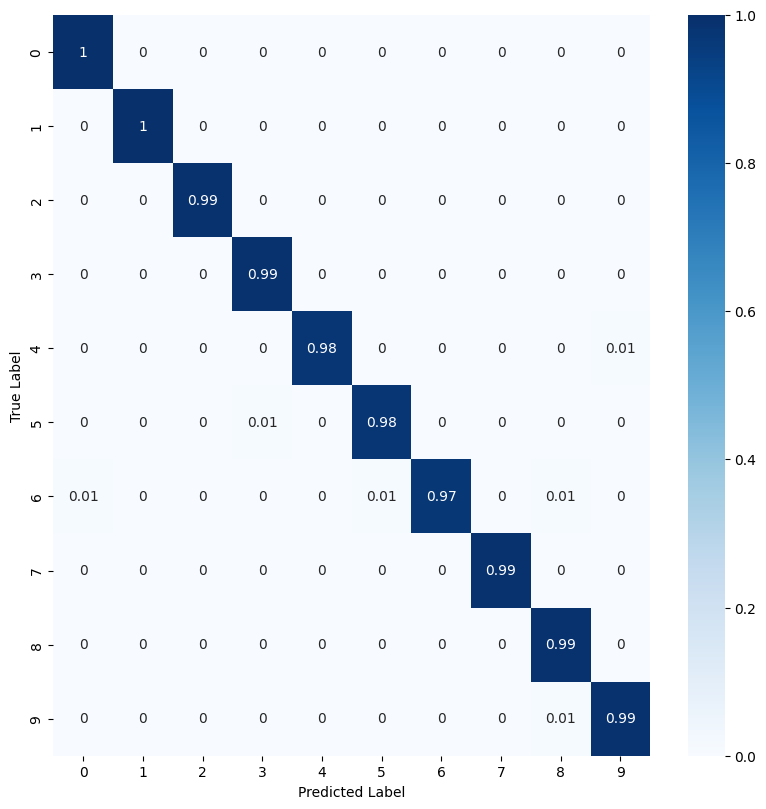

In [ ]:
figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [45]:

from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_true_bin = label_binarize(y_true, classes=classes)
y_pred_bin = y_pred

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Now you can use fpr, tpr, and roc_auc to plot or analyze the ROC curves
# ... (rest of your code to plot or analyze the ROC data) ...

# Calculating the values of TP, TN, FP, FN for a specific class (e.g., class 1)
VP = con_mat[1, 1]  # True Positive
VN = np.sum(con_mat) - np.sum(con_mat[1, :]) - np.sum(con_mat[:, 1]) + con_mat[1, 1]  # True Negative
FP = con_mat[:, 1].sum() - con_mat[1, 1]  # False Positive
FN = con_mat[1, :].sum() - con_mat[1, 1]  # False Negative

# Calculating metrics (for the specific class)
P = VP + FP  # Total Positives (Positive Predictions)
N = VN + FN  # Total Negatives (Negative Predictions)

# Sensitivity (Recall)
S = VP / (VP + FN)

# Specificity
E = VN / (VN + FP)

# Accuracy
A = (VP + VN) / (VP + VN + FP + FN)

# Precision
P_val = VP / (VP + FP)

# F-Score (F1-Score)
F = 2 * ((P_val * S) / (P_val + S))


# Printing the results (for the specific class)
print(f"Sensitivity (S): {S}")
print(f"Specificity (E): {E}")
print(f"Accuracy (A): {A}")
print(f"Precision (P): {P_val}")
print(f"F-Score (F): {F}")
print(f"AUC (ROC Curve - C): {roc_auc[1]}") # AUC for class 1

Sensitivity (S): 0.9991189427312775
Specificity (E): 0.9987591652566272
Accuracy (A): 0.9988
Precision (P): 0.9903930131004367
F-Score (F): 0.9947368421052631
AUC (ROC Curve - C): 0.9999760976567256
